In [1]:
# only adjust settings in this cell
state = 'ID'
root_name = 'Ada'      # which county will root our first district 
k = 2                  # the state has this number of districts
deviation = 0          # use: L=ideal_population-deviation, U=ideal_population-deviation
obj_type = 'cut_edges' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = '..\\dat\\'
filename = state + '_county.json'

from util import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
print("State has total of k =",G._k,"districts")

State has total of k = 2 districts


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 919553
Single district upper population limit U = 919553


In [5]:
# Require this county be in our first district
G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Ada County to be the root. In our graph, this is vertex # 1


In [6]:
from optimization import districting_heuristic

plans = districting_heuristic(G, obj_type='cut_edges', enumeration_limit=10)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-11
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 350 rows, 395 columns and 1687 nonzeros
Model fingerprint: 0xbc2f2284
Variable types: 205 continuous, 190 integer (190 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+05]
Presolve removed 99 rows and 61 columns
Presolve time: 0.00s
Presolved: 251 rows, 334 columns, 1197 nonzeros
Variable types: 198 continuous, 136 integer (136 binary)

Root relaxation: objective 3.420602e+00, 74 iterations, 0.00 seconds (0.00 work units)

 

# cut_edges perimeter ave_invpp
0 36 58.1255 12.4876
1 33 52.7308 8.9619
2 29 51.8409 8.6213
3 30 53.4571 9.4568


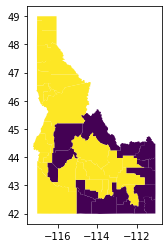

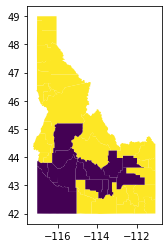

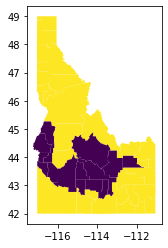

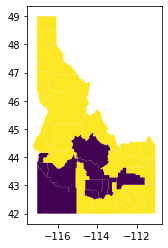

In [7]:
from util import plan_objective
from draw import draw_plan
filename = state + '_county.shp'

print("# cut_edges perimeter ave_invpp")
for p in range(len(plans)):
    plan = plans[p]
    ce = round( plan_objective(G, plan, 'cut_edges') )
    pe = round( plan_objective(G, plan, 'perimeter'), 4)
    pp = round( plan_objective(G, plan, 'inverse_polsby_popper'), 4)
    print(p, ce, pe, pp) #, plan)
    draw_plan( filepath, filename, G, plan )

In [8]:
print("plans =",plans)

plans = [[[0, 1, 2, 3, 5, 8, 11, 15, 16, 18, 25, 26, 27, 28, 30, 32, 33, 40], [4, 6, 7, 9, 10, 12, 13, 14, 17, 19, 20, 21, 22, 23, 24, 29, 31, 34, 35, 36, 37, 38, 39, 41, 42, 43]], [[1, 5, 12, 19, 20, 21, 22, 34, 35, 38, 40, 41, 43], [0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 39, 42]], [[1, 6, 13, 15, 19, 20, 21, 22, 24, 29, 34, 35, 38, 39, 41], [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 23, 25, 26, 27, 28, 30, 31, 32, 33, 36, 37, 40, 42, 43]], [[1, 6, 12, 19, 21, 28, 29, 34, 35, 41, 43], [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 36, 37, 38, 39, 40, 42]]]
